In [200]:
# 1. Import packages
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
print(keras.backend.backend())

tensorflow


In [201]:
import os
import keras
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import mlflow
from sklearn.preprocessing import Normalizer



mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [202]:
# Data Loading
CSV_PATH_test = os.path.join(os.getcwd(),'dataset','cases_malaysia_test.csv')
CSV_PATH_train = os.path.join(os.getcwd(),'dataset','cases_malaysia_train.csv')
train_df = pd.read_csv(CSV_PATH_train)
test_df = pd.read_csv(CSV_PATH_test)

In [203]:
# to check few rows of each dataset
train_df.head(), test_df.head()

(        date cases_new  cases_import  cases_recovered  cases_active  \
 0  25/1/2020         4             4                0             4   
 1  26/1/2020         0             0                0             4   
 2  27/1/2020         0             0                0             4   
 3  28/1/2020         0             0                0             4   
 4  29/1/2020         3             3                0             7   
 
    cases_cluster  cases_unvax  cases_pvax  cases_fvax  cases_boost  ...  \
 0              0            4           0           0            0  ...   
 1              0            0           0           0            0  ...   
 2              0            0           0           0            0  ...   
 3              0            0           0           0            0  ...   
 4              0            3           0           0            0  ...   
 
    cases_60_69  cases_70_79  cases_80  cluster_import  cluster_religious  \
 0            0            0   

In [204]:
# Check if any missing values 
print(train_df.isnull().sum())
print(test_df.isnull().sum())

date                         0
cases_new                    0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_child                  0
cases_adolescent             0
cases_adult                  0
cases_elderly                0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
cluster_import             342
cluster_religious          342
cluster_community          342
cluster_highRisk           342
cluster_education          342
cluster_detentionCentre    342
cluster_workplace          342
dtype: int64
date                      

In [205]:
# Check for '?' values and replace with NaN
print("Checking for '?' values:")
print((train_df == '?').sum())
print((test_df == '?').sum())
train_df.replace('?', np.nan, inplace=True)
test_df.replace('?', np.nan, inplace=True)

Checking for '?' values:
date                       0
cases_new                  6
cases_import               0
cases_recovered            0
cases_active               0
cases_cluster              0
cases_unvax                0
cases_pvax                 0
cases_fvax                 0
cases_boost                0
cases_child                0
cases_adolescent           0
cases_adult                0
cases_elderly              0
cases_0_4                  0
cases_5_11                 0
cases_12_17                0
cases_18_29                0
cases_30_39                0
cases_40_49                0
cases_50_59                0
cases_60_69                0
cases_70_79                0
cases_80                   0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64
date                       0
cases_new                  0
cases

In [206]:
# Convert date column to datetime
train_df["date"] = pd.to_datetime(train_df["date"], format="%d/%m/%Y")
test_df["date"] = pd.to_datetime(test_df["date"], format="%d/%m/%Y")

In [207]:
# Fill missing values in numerical columns fill with median
train_df.fillna(train_df.median(numeric_only=True), inplace=True)
test_df.fillna(test_df.median(numeric_only=True), inplace=True)

# Fill missing values in categorical columns fill with mode
for col in train_df.select_dtypes(include=['object']).columns:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)

for col in test_df.select_dtypes(include=['object']).columns:
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

C:\Users\suhaimi\AppData\Local\Temp\ipykernel_9872\2923380931.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)


In [208]:
# Check if any missing values remain
print(train_df.isnull().sum())
print(test_df.isnull().sum())

date                       0
cases_new                  0
cases_import               0
cases_recovered            0
cases_active               0
cases_cluster              0
cases_unvax                0
cases_pvax                 0
cases_fvax                 0
cases_boost                0
cases_child                0
cases_adolescent           0
cases_adult                0
cases_elderly              0
cases_0_4                  0
cases_5_11                 0
cases_12_17                0
cases_18_29                0
cases_30_39                0
cases_40_49                0
cases_50_59                0
cases_60_69                0
cases_70_79                0
cases_80                   0
cluster_import             0
cluster_religious          0
cluster_community          0
cluster_highRisk           0
cluster_education          0
cluster_detentionCentre    0
cluster_workplace          0
dtype: int64
date                       0
cases_new                  0
cases_import               0
c

In [ ]:
# Convert 'cases_new' to numeric, replacing non-numeric values with NaN and filling with 0
train_df["cases_new"] = pd.to_numeric(train_df["cases_new"], errors='coerce').fillna(0)
test_df["cases_new"] = pd.to_numeric(test_df["cases_new"], errors='coerce').fillna(0)

In [210]:
#Data normalization
train_mean = train_df.mean()
train_std = train_df.std()
train_df = (train_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

C:\Users\suhaimi\AppData\Local\Temp\ipykernel_9872\3746757816.py:4: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  train_df = (train_df - train_mean) / train_std
C:\Users\suhaimi\AppData\Local\Temp\ipykernel_9872\3746757816.py:5: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  test_df = (test_df - train_mean) / train_std


In [211]:
# Data windowing class
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, train_df, test_df, label_columns=None):
        self.train_df = train_df
        self.test_df = test_df
        self.label_columns = label_columns
        
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        self.total_window_size = input_width + shift
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
    
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack([
                labels[:, :, self.column_indices[name]] for name in self.label_columns
            ], axis=-1)
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
        return inputs, labels
    
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32,
        )
        ds = ds.map(self.split_window)
        return ds
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)
    
    @property
    def test(self):
        return self.make_dataset(self.test_df)
    
    def plot(self, model=None, plot_col="cases_new", max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n + 1)
            plt.ylabel(f'{plot_col} [normalized]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index], label='Inputs', marker='.', zorder=-10)
            label_col_index = self.label_columns_indices.get(plot_col, None) if self.label_columns else plot_col_index
            plt.scatter(self.label_indices, labels[n, :, label_col_index], edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index], marker='X', edgecolors='k', label='Predictions', c='#ff7f0e', s=64)
            if n == 0:
                plt.legend()
        plt.xlabel('Time')
        plt.show()
    
    @property
    def example(self):
        result = getattr(self, '_example', None)
        if result is None:
            result = next(iter(self.test))
            self._example = result
        return result


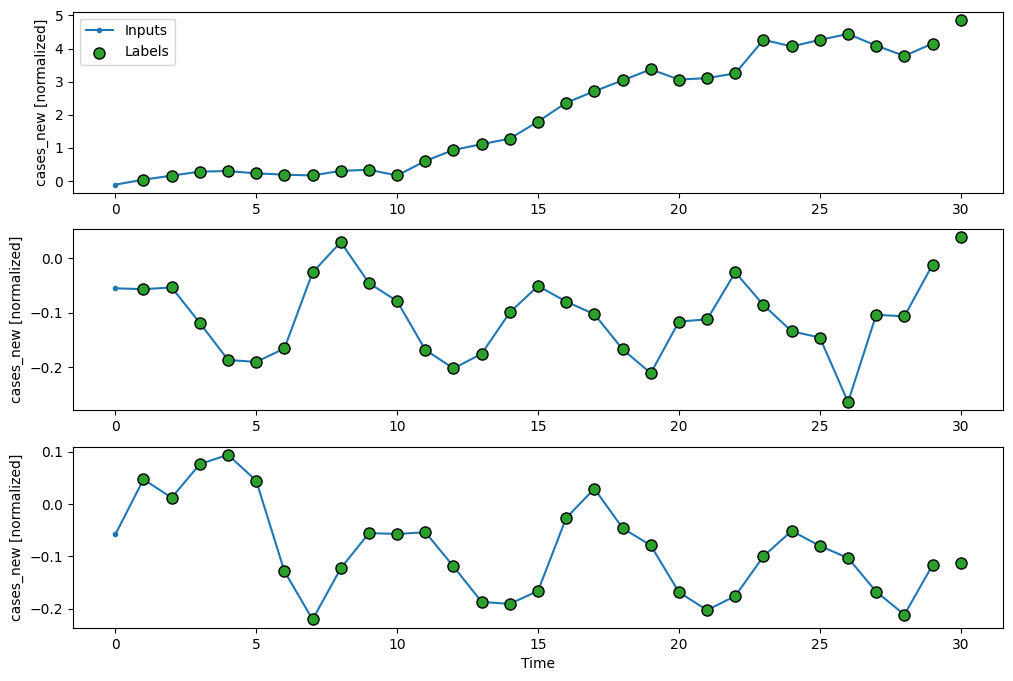

In [212]:
# Create a window for single-time-step single-output prediction
wide_window = WindowGenerator(30, 30, 1, train_df=train_df, test_df=test_df, label_columns=["cases_new"])
wide_window.plot(plot_col="cases_new")



In [213]:
#Create an RNN (LSTM) for the wide window
model_single_step = keras.Sequential()
model_single_step.add(keras.layers.LSTM(units=32,return_sequences=True))
model_single_step.add(keras.layers.LSTM(units=32,return_sequences=True))
model_single_step.add(keras.layers.Dense(units=1))
model_single_step.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [214]:
# Compile and train
model_single_step.compile(optimizer='adam',loss='mse',metrics=["mae"])

In [215]:
#set experiment
mlflow.set_experiment("Covid19-Experiment")

<Experiment: artifact_location='file:///c:/Users/suhaimi/Desktop/Capstone_Project/Capstone_1/mlruns/458921819567090666', creation_time=1741585025165, experiment_id='458921819567090666', last_update_time=1741585025165, lifecycle_stage='active', name='Covid19-Experiment', tags={}>

In [216]:
# Train model with MLflow logging
with mlflow.start_run() as run:
    mlflow_callback = mlflow.keras.MlflowCallback(run)
    run_id = run.info.run_id
    log_path = f"logs/{run_id}"
    ts = keras.callbacks.TensorBoard(log_dir=log_path)
    history_single = model_single_step.fit(wide_window.train,validation_data=None,epochs=10,batch_size=32,callbacks=[mlflow_callback, ts])
    mlflow.keras.log_model(model_single_step, artifact_path="model")

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.8111 - mae: 0.6348
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1894 - mae: 0.2563
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1127 - mae: 0.1712
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0895 - mae: 0.1426
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0778 - mae: 0.1326
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0747 - mae: 0.1296
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0610 - mae: 0.1191
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0690 - mae: 0.1242
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0652 - mae: 0.1191
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0643 - mae: 0.1159


2025/03/10 14:48:40 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/03/10 14:48:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


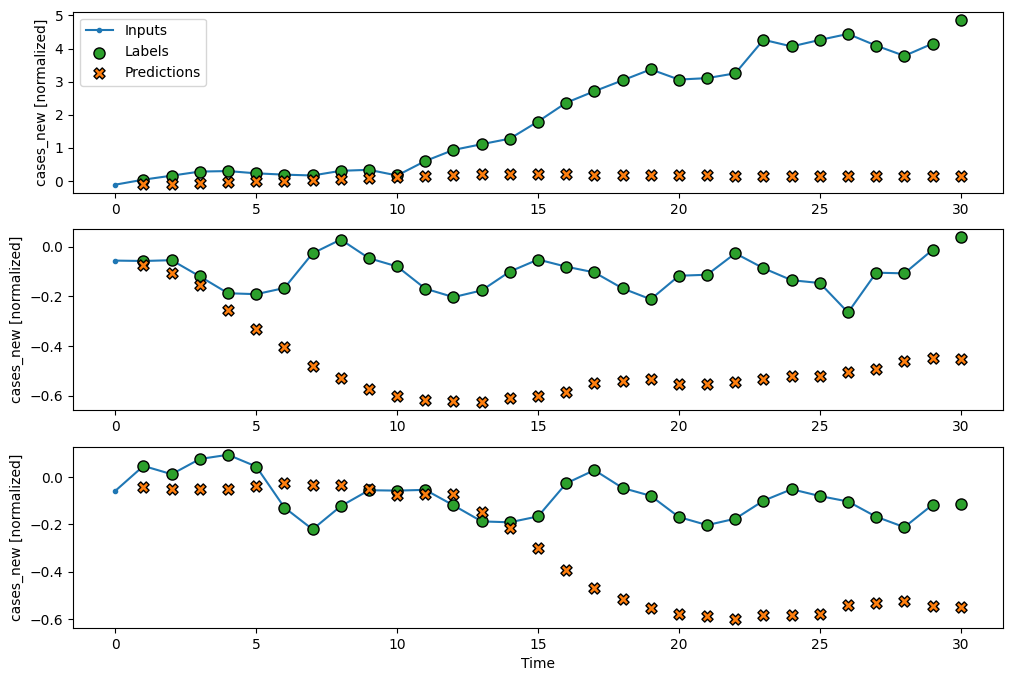

In [217]:
# Show example prediction
wide_window.plot(model=model_single_step,plot_col="cases_new")